For full code (e.g., implementation of each numerical integration method), please view my github repository: https://github.com/rx9933/COE-347/tree/main/HW02. Thank you!

# Question 1

$$
\frac{dy(x)}{dx} = y'(x) = -50(y - \cos(x))
$$


# 1.1 \& 1.2

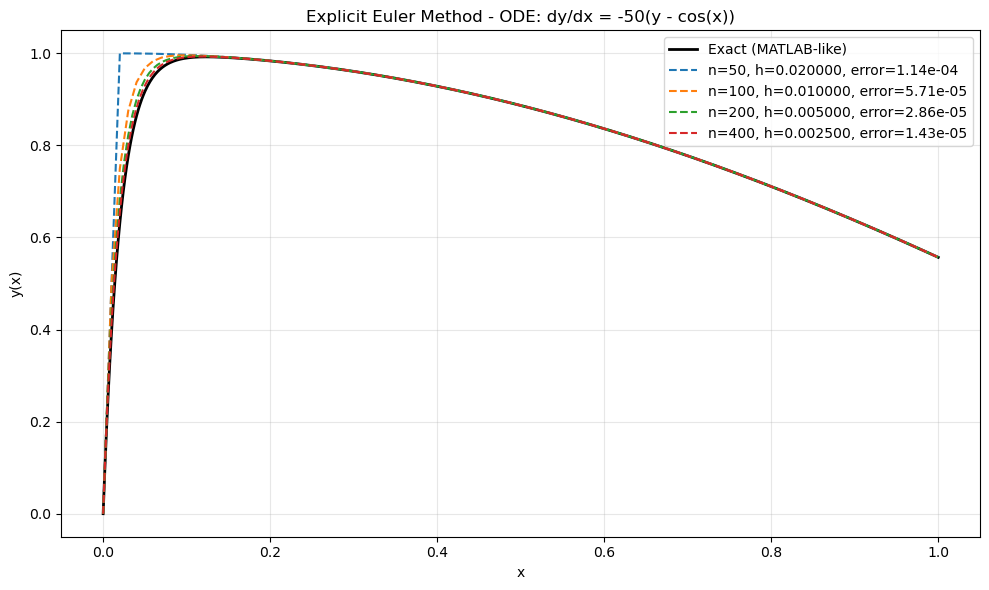


Explicit Euler Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      50     |   0.020000   |   1.1358e-04
     100     |   0.010000   |   5.7061e-05
     200     |   0.005000   |   2.8597e-05
     400     |   0.002500   |   1.4315e-05



/home/mili/COE-347/HW02/solvers/euler_implicit.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y[i+1] = fsolve(F, y_guess)[0]


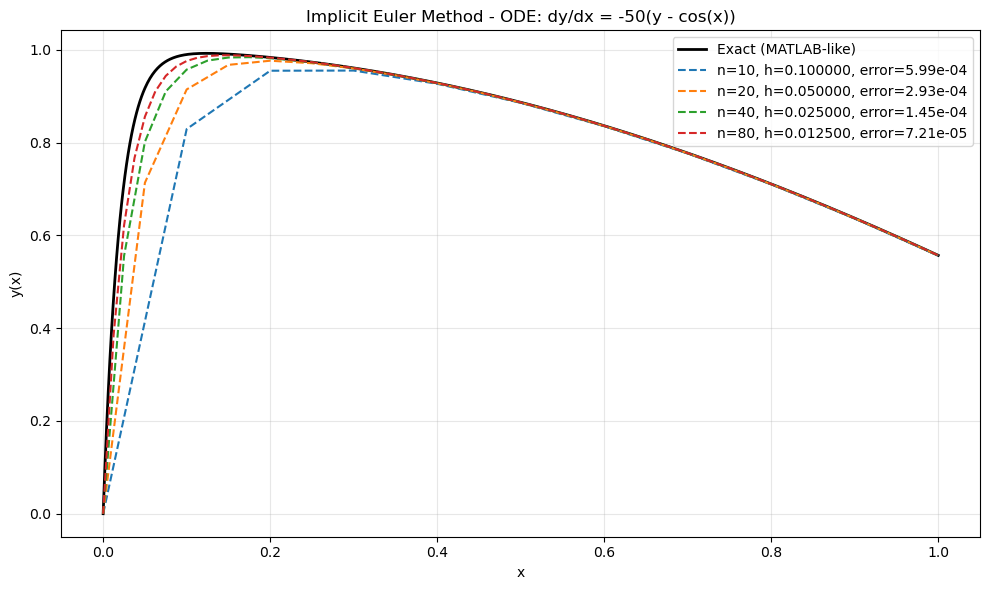


Implicit Euler Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      10     |   0.100000   |   5.9947e-04
      20     |   0.050000   |   2.9325e-04
      40     |   0.025000   |   1.4498e-04
      80     |   0.012500   |   7.2077e-05



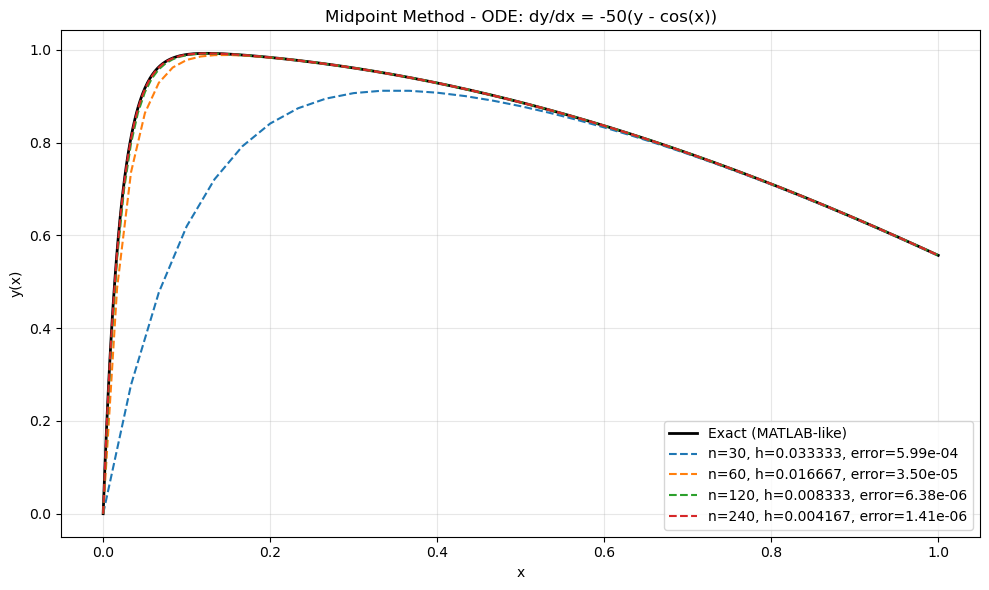


Midpoint Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      30     |   0.033333   |   5.9879e-04
      60     |   0.016667   |   3.5003e-05
     120     |   0.008333   |   6.3805e-06
     240     |   0.004167   |   1.4052e-06



/home/mili/COE-347/HW02/solvers/trapezoidal.py:19: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y[i+1] = fsolve(F, y_guess)[0]


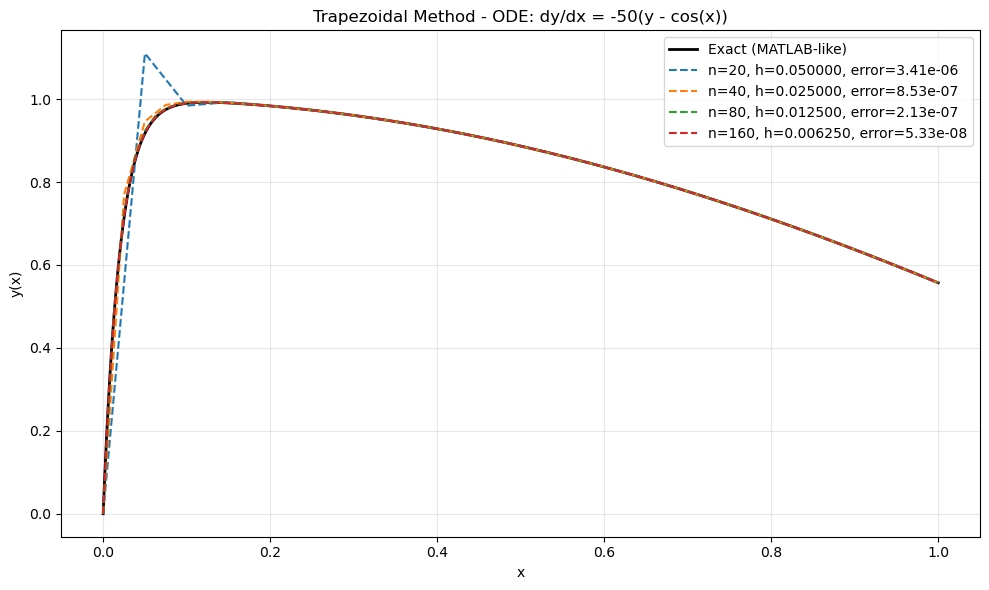


Trapezoidal Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      20     |   0.050000   |   3.4128e-06
      40     |   0.025000   |   8.5304e-07
      80     |   0.012500   |   2.1325e-07
     160     |   0.006250   |   5.3312e-08



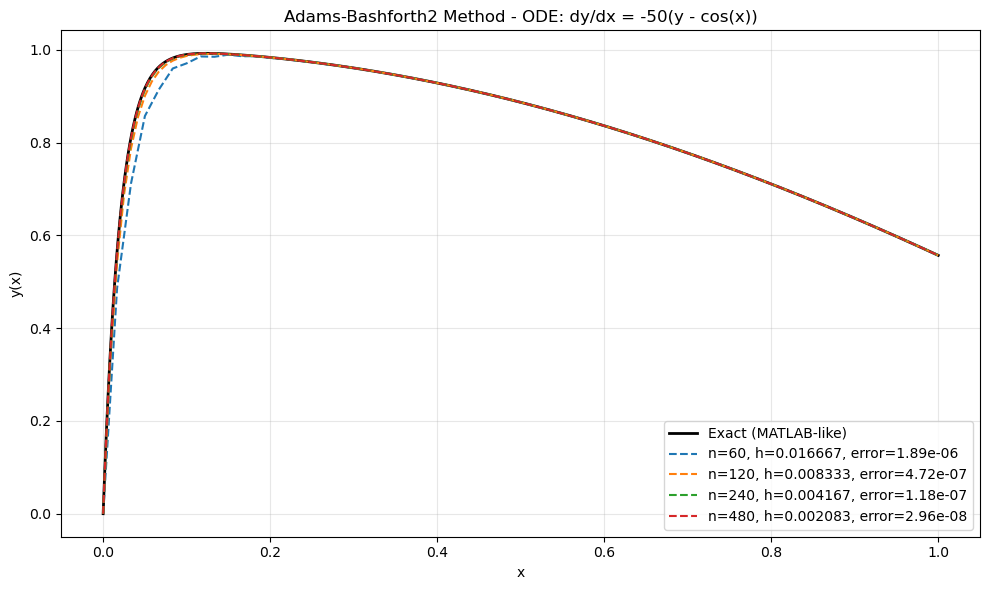


Adams-Bashforth2 Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      60     |   0.016667   |   1.8877e-06
     120     |   0.008333   |   4.7220e-07
     240     |   0.004167   |   1.1826e-07
     480     |   0.002083   |   2.9591e-08



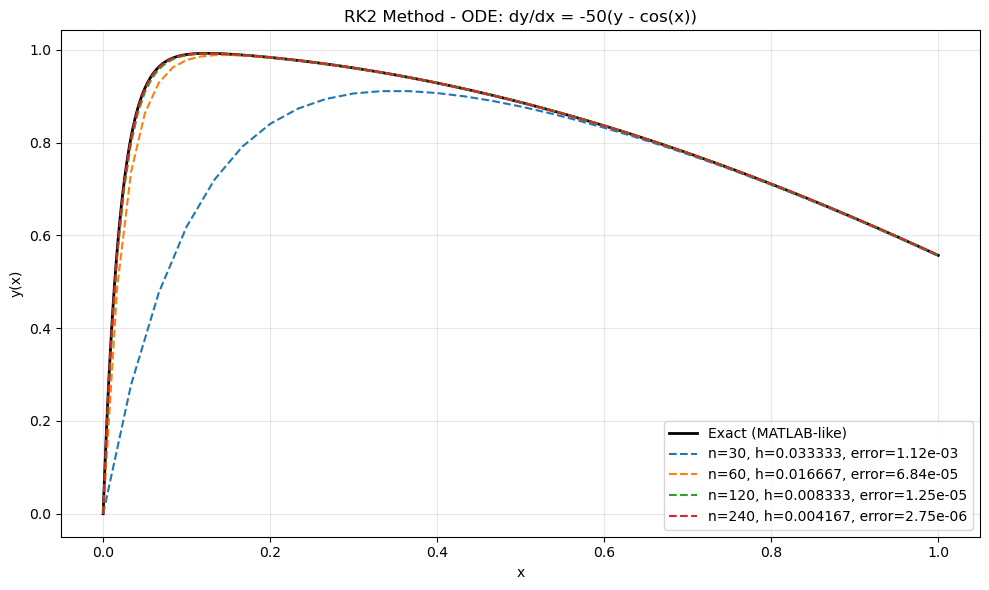


RK2 Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      30     |   0.033333   |   1.1160e-03
      60     |   0.016667   |   6.8442e-05
     120     |   0.008333   |   1.2497e-05
     240     |   0.004167   |   2.7548e-06



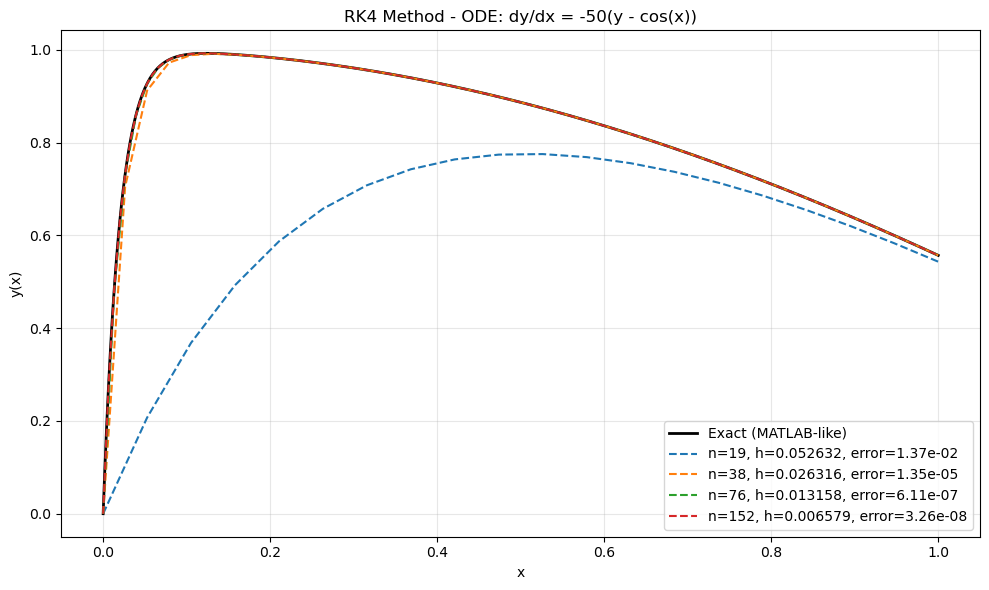


RK4 Errors:
------------------------------------------------------------
Num Steps | Step size h | Relative L2 Error
------------------------------------------------------------
      19     |   0.052632   |   1.3661e-02
      38     |   0.026316   |   1.3483e-05
      76     |   0.013158   |   6.1054e-07
     152     |   0.006579   |   3.2620e-08



/tmp/ipykernel_241181/3232926015.py:255: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, max(num_steps_list)+1000)


<Figure size 1600x1400 with 0 Axes>

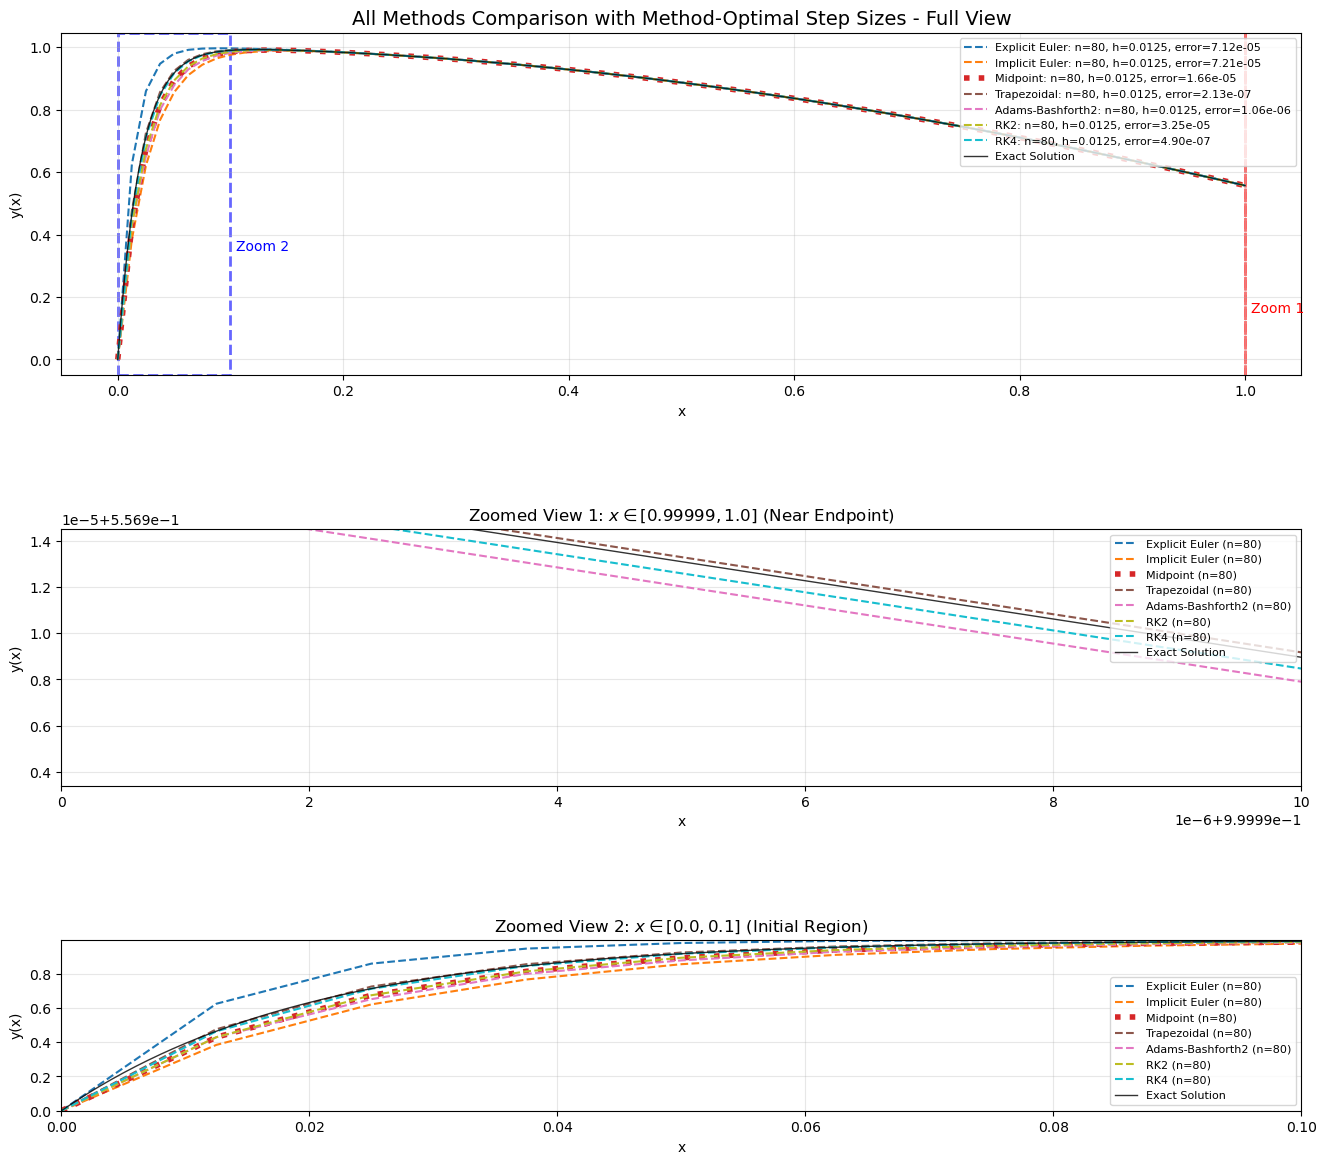

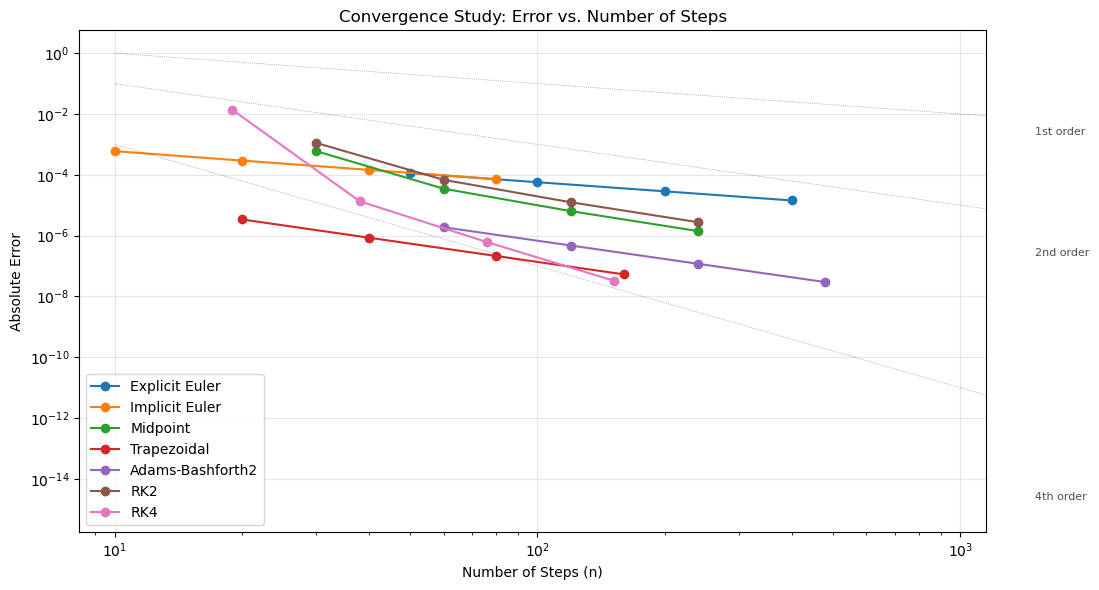

          Method  n (steps)  h (step size)        Error
Adams-Bashforth2         60       0.016667 1.887660e-06
Adams-Bashforth2        120       0.008333 4.722021e-07
Adams-Bashforth2        240       0.004167 1.182614e-07
Adams-Bashforth2        480       0.002083 2.959122e-08
  Explicit Euler         50       0.020000 1.135848e-04
  Explicit Euler        100       0.010000 5.706104e-05
  Explicit Euler        200       0.005000 2.859748e-05
  Explicit Euler        400       0.002500 1.431546e-05
  Implicit Euler         10       0.100000 5.994663e-04
  Implicit Euler         20       0.050000 2.932526e-04
  Implicit Euler         40       0.025000 1.449824e-04
  Implicit Euler         80       0.012500 7.207703e-05
        Midpoint         30       0.033333 5.987948e-04
        Midpoint         60       0.016667 3.500266e-05
        Midpoint        120       0.008333 6.380491e-06
        Midpoint        240       0.004167 1.405227e-06
             RK2         30       0.033333 1.116

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from true import *
from solvers.euler_explicit import *
from solvers.euler_implicit import *
from solvers.midpoint import *
from solvers.trapezoidal import *
from solvers.ab_2 import *
from solvers.rk_2 import *
from solvers.rk_4 import *

# Define the ODE
def f(x, y):
    return -50 * (y - np.cos(x))

# Parameters
y0 = 0
x_range = [0, 1]
x_start, x_end = x_range

# Get exact solution
sol_exact = exact_solution(f)
x_exact = np.linspace(x_start, x_end, 1000)
y_exact = sol_exact.sol(x_exact)[0]

# Define method-specific step size ranges
# Higher order methods can handle larger steps
method_step_ranges = {
    'Explicit Euler': {'min_steps': 50, 'max_steps': 8000, 'num_points': 6},
    'Implicit Euler': {'min_steps': 10, 'max_steps': 1600, 'num_points': 6},
    'Midpoint': {'min_steps': 30, 'max_steps': 1600, 'num_points': 6},  # implicit_midpoint
    'Trapezoidal': {'min_steps': 20, 'max_steps': 1600, 'num_points': 6},
    'Adams-Bashforth2': {'min_steps': 60, 'max_steps': 1600, 'num_points': 6},
    'RK2': {'min_steps': 30, 'max_steps': 1600, 'num_points': 6},
    'RK4': {'min_steps': 19, 'max_steps': 320, 'num_points': 6}
}

# Dictionary of methods
methods = {
    'Explicit Euler': explicit_euler,
    'Implicit Euler': implicit_euler,
    'Midpoint': midpoint,  # implicit_midpoint,ss
    'Trapezoidal': trapezoidal,
    'Adams-Bashforth2': adams_bashforth2,
    'RK2': rk2,
    'RK4': rk4
}
num_values = 4
# Plot each method separately with different step sizes
for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    
    # Plot exact solution
    plt.plot(x_exact, y_exact, 'k-', linewidth=2, label='Exact (MATLAB-like)')
    
    # Get method-specific step sizes
    config = method_step_ranges[method_name]
    min_steps = config['min_steps']
    max_steps = config['max_steps']
    num_points = config['num_points']
    
    # Generate geometrically spaced step counts for this method
    num_steps_list = [int(min_steps * 2**i) for i in range(num_values)]
    
    # Plot numerical solutions for different step sizes
    for i, num_steps in enumerate(num_steps_list):
        h = (x_end - x_start) / num_steps  # Ensure exact step size
        
        x_num, y_num, n_evals = method_func(f, y0, x_range, h, return_evals=True)
        
        # Interpolate exact solution to numerical grid for error calculation
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        
        plt.plot(x_num, y_num, '--', linewidth=1.5, 
                label=f'n={num_steps}, h={h:.6f}, error={error:.2e}')
    
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'{method_name} Method - ODE: dy/dx = -50(y - cos(x))')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    os.makedirs('solo_method', exist_ok=True)
    plt.savefig(f'solo_method/{method_name.replace(" ", "_")}_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print errors table
    print(f"\n{method_name} Errors:")
    print("-" * 60)
    print("Num Steps | Step size h | Relative L2 Error")
    print("-" * 60)
    for num_steps in num_steps_list:
        h = (x_end - x_start) / num_steps
        x_num, y_num = method_func(f, y0, x_range, h)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        print(f"    {num_steps:4d}     |   {h:8.6f}   |   {error:.4e}")
    print()

# All methods comparison on a single plot with split view
# Use method-appropriate step sizes for comparison
method_optimal_steps = {
    'Explicit Euler': 5000,   # Need many steps
    'Implicit Euler': 200,
    'Midpoint': 200,
    'Trapezoidal': 200,
    'Adams-Bashforth2': 200,
    'RK2': 200,
    'RK4': 40                 # Fewer steps needed for RK4
}

plt.figure(figsize=(16, 14))  # Increased from (14, 12) to (16, 14)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 14), height_ratios=[4, 3, 2])  # Changed from [3, 3, 2] to [4, 3, 2]
plt.subplots_adjust(hspace=0.6)

# Define color cycle for better visibility
colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))
color_dict = {name: color for name, color in zip(methods.keys(), colors)}

# Plot all methods on all axes
for idx, (method_name, method_func) in enumerate(methods.items()):
    style, linewidth = '--', 1.5
    
    # Use method-specific step count
    static_num_steps = 80
    h_static = (x_end - x_start) / static_num_steps

    x_num, y_num = method_func(f, y0, x_range, h_static)
    y_exact_interp = sol_exact.sol(x_num)[0]
    error = compute_error(y_num, y_exact_interp)
    
    if method_name == 'Midpoint':
        style, linewidth = 'dotted', 4.0
    
    # Main plot (full range)
    ax1.plot(x_num, y_num, linestyle=style, linewidth=linewidth, color=color_dict[method_name],
             label=f'{method_name}: n={static_num_steps}, h={h_static:.4f}, error={error:.2e}')
    
    # Zoomed plot 1 (0.9999 to 1.0)
    ax2.plot(x_num, y_num, linestyle=style, linewidth=linewidth, color=color_dict[method_name],
             label=f'{method_name} (n={static_num_steps})')
    x = 1e-5
    zoom_x_min, zoom_x_max = 1-x, 1.0
    ax2.set_xlim(zoom_x_min, zoom_x_max)
    # Auto-adjust y-limits based on data in zoomed region
    zoom_idx = (x_exact >= zoom_x_min) & (x_exact <= zoom_x_max)
    x = 1e-5
    zoom_y_min = y_exact[zoom_idx].min() * (1-x)
    zoom_y_max = y_exact[zoom_idx].max() * (1+x)
    ax2.set_ylim(zoom_y_min, zoom_y_max)

    # Zoomed plot 2 (0 to 0.2)
    ax3.plot(x_num, y_num, linestyle=style, linewidth=linewidth, color=color_dict[method_name],
             label=f'{method_name} (n={static_num_steps})')

# Plot exact solution on all axes
ax1.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)
ax2.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)
ax3.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)

# Customize main plot
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_title('All Methods Comparison with Method-Optimal Step Sizes - Full View', fontsize=14)
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)

x = 1e-5
# Customize zoomed plot (focus on region where lines overlap, e.g., x=[0.9, 1.0])
zoom1_x_min, zoom1_x_max = 1-x, 1.0
ax2.set_xlim(zoom_x_min, zoom_x_max)
# Auto-adjust y-limits based on data in zoomed region
x = 1e-5
zoom_idx = (x_exact >= zoom_x_min) & (x_exact <= zoom_x_max)
zoom_y_min = y_exact[zoom_idx].min() * (1-x)
zoom_y_max = y_exact[zoom_idx].max() * (1+x)
ax2.set_ylim(zoom_y_min, zoom_y_max)

ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title(rf'Zoomed View 1: $x \in [{zoom1_x_min}, {zoom1_x_max}]$ (Near Endpoint)', fontsize=12)
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(True, alpha=0.3)

# Customize zoomed plot 2 (0 to 0.2)
zoom2_x_min, zoom2_x_max = 0.0, 0.1
ax3.set_xlim(zoom2_x_min, zoom2_x_max)
# Auto-adjust y-limits based on data in zoomed region
zoom2_idx = (x_exact >= zoom2_x_min) & (x_exact <= zoom2_x_max)
zoom2_y_min = y_exact[zoom2_idx].min() * 0.99
zoom2_y_max = y_exact[zoom2_idx].max() * 1.01
ax3.set_ylim(zoom2_y_min, zoom2_y_max)

ax3.set_xlabel('x')
ax3.set_ylabel('y(x)')
ax3.set_title(rf'Zoomed View 2: $x \in [{zoom2_x_min}, {zoom2_x_max}]$ (Initial Region)', fontsize=12)
ax3.legend(loc='lower right', fontsize=8)
ax3.grid(True, alpha=0.3)

# Add rectangles to main plot showing zoom regions
import matplotlib.patches as patches

# Zoom region 1 rectangle
rect1 = patches.Rectangle((zoom1_x_min, ax1.get_ylim()[0]), 
                         zoom1_x_max - zoom1_x_min, 
                         ax1.get_ylim()[1] - ax1.get_ylim()[0],
                         linewidth=2, edgecolor='red', facecolor='none', 
                         linestyle='--', alpha=0.6)
ax1.add_patch(rect1)
ax1.text(zoom1_x_max + 0.005, ax1.get_ylim()[0] + 0.2, 'Zoom 1', 
         color='red', fontsize=10)

# Zoom region 2 rectangle
rect2 = patches.Rectangle((zoom2_x_min, ax1.get_ylim()[0]), 
                         zoom2_x_max - zoom2_x_min, 
                         ax1.get_ylim()[1] - ax1.get_ylim()[0],
                         linewidth=2, edgecolor='blue', facecolor='none', 
                         linestyle='--', alpha=0.6)
ax1.add_patch(rect2)
ax1.text(zoom2_x_max + 0.005, ax1.get_ylim()[0] + 0.4, 'Zoom 2', 
         color='blue', fontsize=10)
plot_data = {}

# Combined convergence study plot with all methods
plt.figure(figsize=(10, 6))

for method_name, method_func in methods.items():
    config = method_step_ranges[method_name]
    min_steps = config['min_steps']
    
    num_steps_list = [int(min_steps * 2**i) for i in range(num_values)]
    
    inv_h = []
    errors = []
    
    for num_steps in num_steps_list:
        h = (x_end - x_start) / num_steps
        x_num, y_num = method_func(f, y0, x_range, h)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        
        inv_h.append(num_steps)   # since h = 1 / n on [0,1]
        errors.append(error)
    
    # store for later order estimation
    plot_data[method_name] = (inv_h, errors)
    
    plt.plot(inv_h, errors, 'o-', label=f'{method_name}')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, max(num_steps_list)+1000)
plt.xlabel('Number of Steps (n)')
plt.ylabel('Absolute Error')
plt.title('Convergence Study: Error vs. Number of Steps')
plt.legend()
plt.tight_layout()

# Add reference slopes for convergence order
x_ref = np.array([10, 10000], dtype=float)
for order, label in [(1, '1st order'), (2, '2nd order'), (4, '4th order')]:
    y_ref = 10 * x_ref**(-order)  # Arbitrary scaling for visibility
    plt.plot(x_ref, y_ref, 'k:', alpha=0.5, linewidth=0.5)
    plt.text(x_ref[-1]*.15, y_ref[-1]*2.1, label, fontsize=8, alpha=0.7)

os.makedirs('convergence', exist_ok=True)
plt.savefig('convergence/error_vs_steps_method_ranges.png', dpi=150, bbox_inches='tight')
plt.show()
import pandas as pd

rows = []

for method_name, (inv_h, errors) in plot_data.items():
    for n, err in zip(inv_h, errors):
        h = (x_end - x_start) / n
        rows.append({
            "Method": method_name,
            "n (steps)": n,
            "h (step size)": h,
            "Error": err
        })

df = pd.DataFrame(rows)

# Sort nicely
df = df.sort_values(by=["Method", "n (steps)"])

print(df.to_string(index=False))

# Print computational efficiency comparison
print("\n" + "="*100)
print("COMPUTATIONAL EFFICIENCY COMPARISON")
print("="*100)
print(f"{'Method':<20} {'Steps to Error < 1e-3':<25} {'Function Evals':<20} {'Step Size':<15}")
print("-"*100)

target_error = 1e-3
for method_name, method_func in methods.items():
    config = method_step_ranges[method_name]
    min_steps = config['min_steps']
    max_steps = config['max_steps']
    
    # Find steps needed for target accuracy
    test_steps = [int(min_steps * 2**i) for i in range(num_values)]
    
    for num_steps in sorted(test_steps):
        h = (x_end - x_start) / num_steps
        x_num, y_num, n_evals = method_func(f, y0, x_range, h, return_evals=True)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        
        if error < target_error:
            print(f"{method_name:<20} {num_steps:<25} {n_evals:<20} {h:<15.6f}")
            break
    else:
        print(f"{method_name:<20} {'> ' + str(max_steps):<25} {'-':<20} {'-':<15}")

print("="*100)

# 1.3

In [2]:
expected_order = {
    "Explicit Euler": 1,
    "Implicit Euler": 1,
    "Midpoint": 2,
    "Trapezoidal": 2,
    "Adams-Bashforth2": 2,
    "RK2": 2,
    "RK4": 4,
}

for method, (inv_h, errors) in plot_data.items():
    h = 1.0 / np.array(inv_h)
    E = np.array(errors)

    # Build least-squares system: log(E) = alpha * log(h) + log(C)
    X = np.column_stack([
        np.log(h),                 # slope term
        np.ones_like(h)            # intercept term
    ])
    y = np.log(E)

    # Solve least squares
    coeffs, residuals, rank, svals = np.linalg.lstsq(X, y, rcond=None)
    alpha, logC = coeffs

    alpha_exp = expected_order.get(method, None)

    if alpha_exp is not None:
        print(f"{method:20s}: alpha ≈ {alpha:.2f} (expected {alpha_exp})")
    else:
        print(f"{method:20s}: alpha ≈ {alpha:.2f}")


Explicit Euler      : alpha ≈ 1.00 (expected 1)
Implicit Euler      : alpha ≈ 1.02 (expected 1)
Midpoint            : alpha ≈ 2.87 (expected 2)
Trapezoidal         : alpha ≈ 2.00 (expected 2)
Adams-Bashforth2    : alpha ≈ 2.00 (expected 2)
RK2                 : alpha ≈ 2.84 (expected 2)
RK4                 : alpha ≈ 6.05 (expected 4)


# 1.4

In [3]:
# Minimal all_data creation
common_num_steps = [50*2**i  for i in range(0,8)]  # Choose appropriate values
all_data = {}

for method_name, method_func in methods.items():
    errors = []
    evals = []
    
    for num_steps in common_num_steps:
        h = (x_end - x_start) / num_steps
        x_num, y_num, n_evals = method_func(f, y0, x_range, h, return_evals=True)
        y_exact_interp = sol_exact.sol(x_num)[0]
        error = compute_error(y_num, y_exact_interp)
        errors.append(error)
        evals.append(n_evals)
    
    all_data[method_name] = {
        'errors': np.array(errors),
        'evals': np.array(evals),
        'num_steps': common_num_steps,
        'step_sizes': [(x_end - x_start)/n for n in common_num_steps]
    }

/home/mili/COE-347/HW02/solvers/euler_implicit.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y[i+1] = fsolve(F, y_guess)[0]
/home/mili/COE-347/HW02/solvers/trapezoidal.py:19: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y[i+1] = fsolve(F, y_guess)[0]


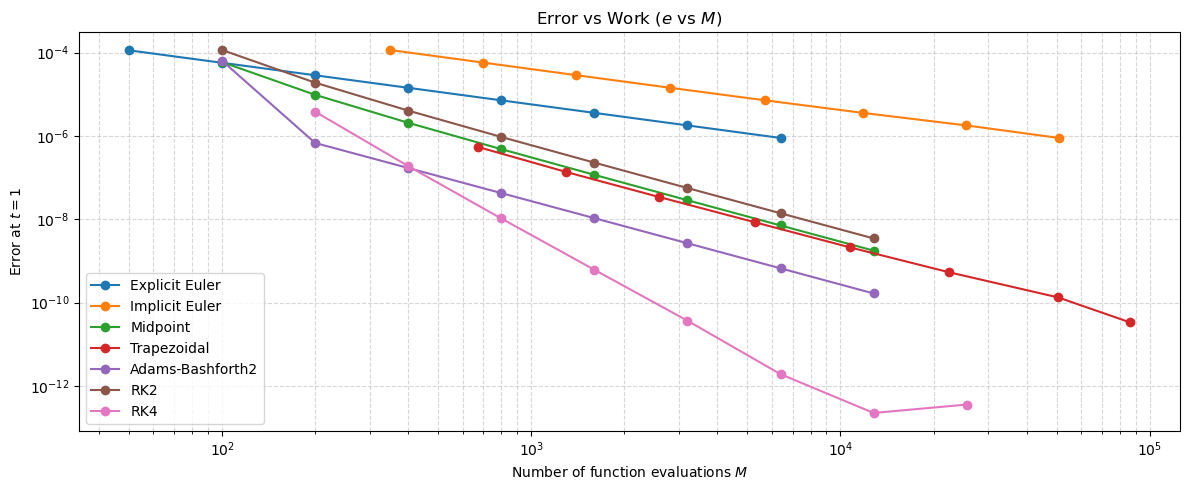

In [4]:
plt.figure(figsize=(12, 5))

for method_name in all_data.keys():
    M_vals = all_data[method_name]['evals']      # Function evaluations
    e_vals = all_data[method_name]['errors']     # Errors
    
    # Ensure numpy arrays
    M_vals = np.array(M_vals, dtype=float)
    e_vals = np.array(e_vals, dtype=float)
    
    plt.loglog(M_vals, e_vals, marker='o', label=method_name)

plt.xlabel(r'Number of function evaluations $M$')
plt.ylabel(r'Error at $t = 1$')
plt.title(r'Error vs Work ($e$ vs $M$)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

The log–log plot of error $e$ versus number of function evaluations $M$ reveals the relative efficiency of the time integration methods.
1.  Error decreases monotonically with increasing work for all methods, confirming convergence as the number of function evaluations grows.

2. First-order methods such as Explicit Euler require significantly more function evaluations to achieve a given accuracy, as evidenced by their shallow slope.

3. Implicit Euler does not provide accuracy benefits over explicit Euler when work is measured in function evaluations, despite its improved stability properties.

4. In general, implicit methods incur additional function evaluations due to nonlinear solves at each time step; higher-order implicit schemes (e.g. trapezoidal) can be competitive (with higher-order explicit methods, e.g., midpoint and adams-bashforth2), but low-order implicit methods (implicit euler over forward euler) do not improve (rather decrease) accuracy per unit work.

5. Higher-order methods achieve lower error for the same computational effort, resulting in steeper curves. 

6. Among second-order methods, midpoint, trapezoidal, and RK2 show comparable efficiency, with Adams–Bashforth 2 being significantly better at higher work/number of function evaluations. 

7. For moderate to high accuracy requirements, increasing method order is far more effective than simply increasing the number of steps in low-order methods.

8. For implicit methods, the computational work per time step is not fixed and depends on how the nonlinear implicit equation is solved, including solver tolerances and convergence behavior. As a result, the number of function evaluations reflects both the time integration method and the nonlinear solver implementation.